Total píxeles pares: 32768
Total píxeles impares: 32768


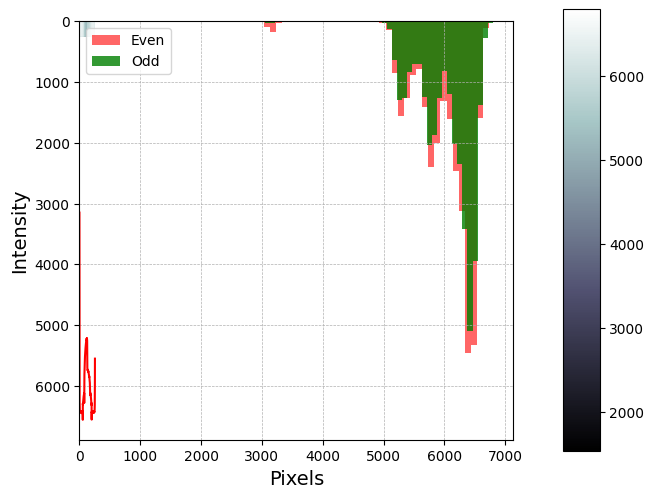

In [20]:
# -*- coding: utf-8 -*-
"""Alignment SM (2).ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1GUcOxVQlYR18sSsIVhagt7SEMTRQz3he
"""

import numpy as np
import matplotlib.pyplot as plt

Npixeles=256
NI=1 #Número de imágenes RAW
NF=1 #Número de imágenes FF
NThr=2
#nameP="Simulaciones"
#nameI="G4MProc"
#nameV="TestMNI"
#nameF="Alignment"
#nameD="32"
#nameH="RAW"
#Step="13.8"
#nameS="PData"
#nameFF=nameP+"/"+nameI+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameH+Step
nameFF= r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones con Alumina\Monocromatico\RAW\InLine_HA_ALUMINA_PMMA_60keV_d1m_a31.6um_p110um_step13000_dith-13000_th1_00500eV_1"
def ImagenesR(name,Npixeles):
    I=[]
    for k in range(0,len(name),Npixeles*Npixeles):
        Im=np.zeros((Npixeles,Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j,i]=name[i+Npixeles*j+k]
        I.append(Im)
    return I

def Imagenes(name,Npixeles,NI):
    D=[]
    for i in range(1,NI+1):
        Raw = np.fromfile(name+".raw", dtype='float32')
        K=ImagenesR(Raw,Npixeles)
        D.append(K)
    return D

def ImagenesA(name,Npixeles,NI,NThr):
    A=[]
    for i in range(NThr):
        Mean=np.zeros((Npixeles, Npixeles))
        for j in range (NI):
            Mean=Mean+name[j][i]
        A.append(Mean)
    return A

def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

def Aver(name,X1,X2,Step):
    P=np.copy(name)
    for i in range(len(P)):
        P[i,X1:X2]=(1/2)*(P[i,X1-Step:X2-Step]+P[i,X1+Step:X2+Step])
    return P

FF=Imagenes(nameFF,Npixeles,NF)
FFA=ImagenesA(FF,Npixeles,NF,NThr)

k=1
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(FFA[k], cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

plt.plot(PI(FFA[k],0,256,0,256), '-', color="red")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("Intensity",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)

FFAe=FFA[k][:,::2]
FFAo=FFA[k][:,1::2]

### Conteo de píxeles pares e impares
print("Total píxeles pares:", FFAe.size)
print("Total píxeles impares:", FFAo.size)

GNMe=plt.hist(np.ravel(FFAe),bins=52,color="red",label="Even", alpha=0.6)
GNMo=plt.hist(np.ravel(FFAo),bins=52,color="green",label="Odd", alpha=0.8)
#plt.title("Step "+Step+" $\mu$m - "+nameD+" keV", fontsize=16)
plt.legend()

np.savetxt(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones con Alumina\Monocromatico\RAW\txt\Alumina_Placa_60keV.txt",FFA[k])

# Para muchos archivos

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# =================== PARÁMETROS ===================
Npixeles = 256
NThr = 2
carpeta = r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones monocromaticas para Aorta, sangre y placa\PEPI5\RAW"
salida  = r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones monocromaticas para Aorta, sangre y placa\PEPI5\RAW5 txt"
# =================================================

def ImagenesR(name, Npixeles):
    I = []
    for k in range(0, len(name), Npixeles * Npixeles):
        Im = np.zeros((Npixeles, Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j, i] = name[i + Npixeles * j + k]
        I.append(Im)
    return I

def Imagenes(name, Npixeles):
    D = []
    Raw = np.fromfile(name, dtype='float32')
    K = ImagenesR(Raw, Npixeles)
    D.append(K)
    return D

def ImagenesA(name, Npixeles, NThr):
    A = []
    for i in range(NThr):
        Mean = np.zeros((Npixeles, Npixeles))
        for j in range(len(name)):
            Mean = Mean + name[j][i]
        A.append(Mean)
    return A

# =================== PROCESO ===================
# Buscar todos los archivos .raw en la carpeta
archivos_raw = [f for f in os.listdir(carpeta) if f.endswith(".raw")]

for archivo in archivos_raw:
    ruta_raw = os.path.join(carpeta, archivo)
    print(f"Procesando: {archivo}")

    FF = Imagenes(ruta_raw, Npixeles)
    FFA = ImagenesA(FF, Npixeles, NThr)

    # Guardar el segundo frame (k=1) como en tu ejemplo
    k = 1
    nombre_txt = os.path.splitext(archivo)[0] + ".txt"
    ruta_txt = os.path.join(salida, nombre_txt)
    np.savetxt(ruta_txt, FFA[k])

    print(f"Guardado: {ruta_txt}")

print("Conversión completada para todos los archivos .raw")


Procesando: Absorcion_5_AortaSangrePlaca_15keV_d1m_a31.6um_p110um_step13000_dith-13000_th1_00500eV_1.raw
Guardado: C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones monocromaticas para Aorta, sangre y placa\PEPI5\RAW5 txt\Absorcion_5_AortaSangrePlaca_15keV_d1m_a31.6um_p110um_step13000_dith-13000_th1_00500eV_1.txt
Procesando: Absorcion_5_AortaSangrePlaca_20keV_d1m_a31.6um_p110um_step13000_dith-13000_th1_00500eV_1.raw
Guardado: C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones monocromaticas para Aorta, sangre y placa\PEPI5\RAW5 txt\Absorcion_5_AortaSangrePlaca_20keV_d1m_a31.6um_p110um_step13000_dith-13000_th1_00500eV_1.txt
Procesando: Absorcion_5_AortaSangrePlaca_25keV_d1m_a31.6um_p110um_step13000_dith-13000_th1_00500eV_1.raw
Guardado: C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones monocromaticas para Aorta, sangre 